# Multiple Linear Regression

## Bike Sharing Assignment
- By Nanda Kumar M R

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Stats library for model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Scikit Library for pre-processing works
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import datetime
from scipy.stats import pearsonr

## Reading data & checks

In [2]:
#From data dictionary, instant is the index column of the data
bike_df = pd.read_csv('day.csv', index_col='instant')

In [3]:
# Check the head of the dataset
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# data shape
bike_df.shape

(730, 15)

In [5]:
# head of the dataset
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
# describe numeric column
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking for null values
count=bike_df.isnull().sum()
print(count)

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Observation:
- Null value is not found in any column
- Difference between mean and median is very low , so we can conclude that data has no outliers

##  Visualising the Data

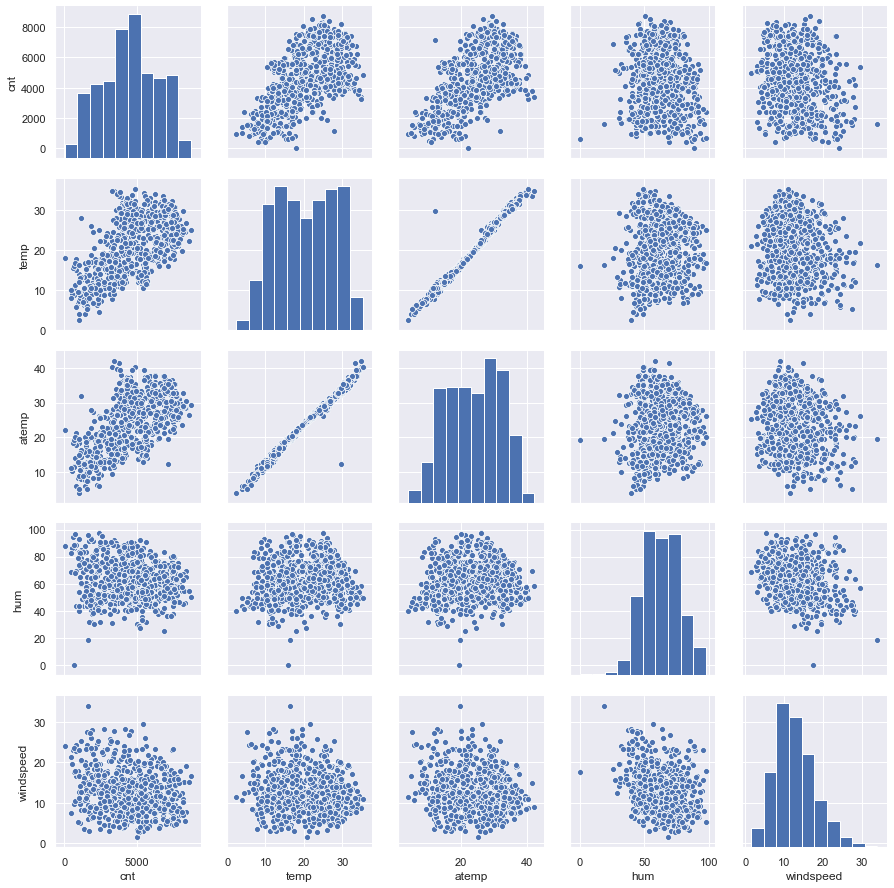

In [9]:
# Visualising Numerical columns
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Observation:
- From the above result, we can observe that target variable cnt show positive trend with temp and atemp
- hum and windspeed values are scattered across the target variable cnt

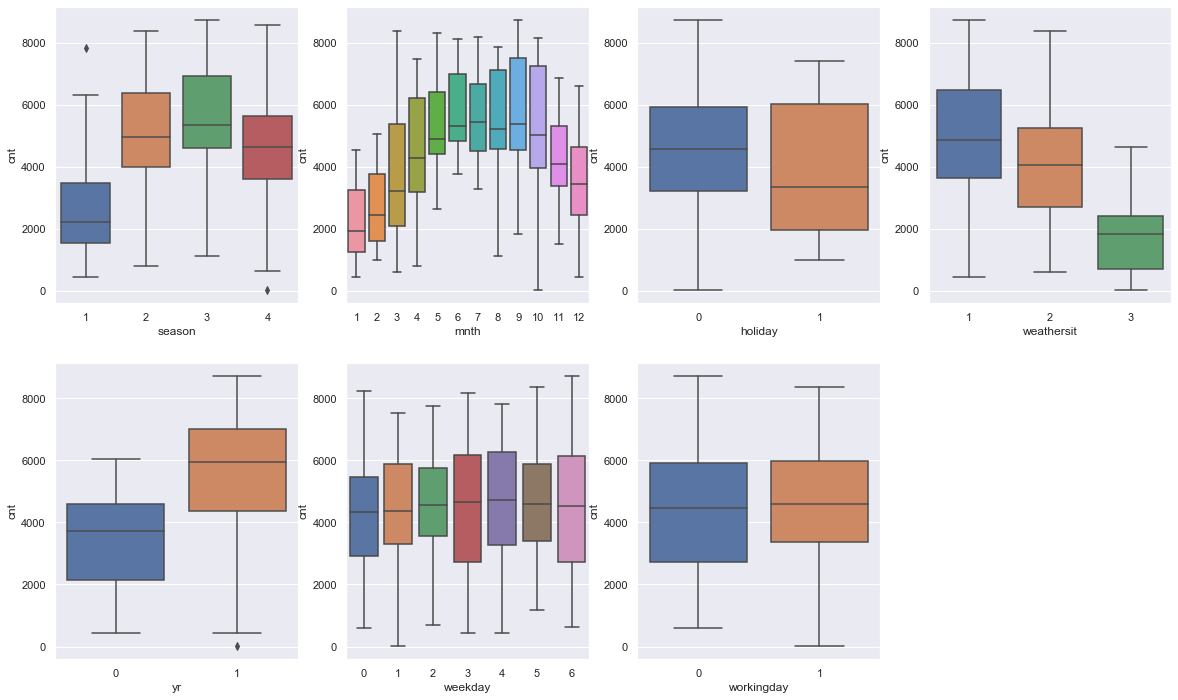

In [10]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

#### Observation:
- Spring season has the least bike sharing count
- The number of bike shares increased in 2019
- The cnt has no values for weather situation 4 ('Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')
- The cnt values increases in summer months and less during holidays

## Data Preparation and Exploratory Data Analysis

#### From data dictionary, dteday : date

In [11]:
bike_df.dteday.describe()

count            730
unique           730
top       03-10-2019
freq               1
Name: dteday, dtype: object

#### Checking the range for date, month and year is within the limit

In [12]:
bike_df['dteday'].apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [13]:
bike_df['dteday'].apply(lambda x: int(x.split('-')[1])).describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [14]:
bike_df['dteday'].apply(lambda x: int(x.split('-')[2])).describe()

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

#### As date, month and year lies within the range, extracting only date and renaming the column to date since we have month and year as seperate column in that data

In [15]:
bike_df['dteday'] = bike_df['dteday'].apply(lambda x: int(x.split('-')[0]))
bike_df = bike_df.rename(columns={"dteday": "date"})

#### From data dictionary, season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [16]:
bike_df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

#### Mapping the column as follows:
- 1: spring
- 2: summer
- 3: fall
- 4: winter

In [17]:
bike_df['season'] = bike_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

#### From data dictionary, yr : year (0: 2018, 1:2019)

In [18]:
bike_df.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

#### We will keep this values as it is, because normalising column consisting of only 0 (2018) & 1 (2019) will have no effect.

#### From data dictionary,mnth : month ( 1 to 12)

In [19]:
bike_df.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

#### We can proceed with mnth column without dropping / changing any records as range is correct between 1 to 12

#### As Month column is categorical column with each value corresponding to specific month hence mapping numbers to respective Month Name

In [20]:
bike_df.mnth = bike_df.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

#### From data dictionary, holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

In [21]:
bike_df.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

#### Holiday is a Categorical Nominal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively. So no change is required to this column

#### From data dictionary, weekday : day of the week

In [22]:
bike_df.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [23]:
bike_df.groupby(by='weekday').weekday.count()

weekday
0    105
1    105
2    104
3    103
4    104
5    104
6    105
Name: weekday, dtype: int64

#### In US, it is usually considered that 1st day of week is Sunday and also from "Working Day Column", we can see that "Working Day" is marked as "1" for values of 1, 2, 3, 4, 5 in "Week day". From this we can infer that, for weekday column, Sunday is mapped to 0, Monday is mapped to 1 and so on

In [24]:
bike_df['weekday'] = bike_df.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [25]:
bike_df.groupby(by='weekday').weekday.count()

weekday
friday       104
monday       105
saturday     105
sunday       105
thursday     104
tuesday      104
wednesday    103
Name: weekday, dtype: int64

####  From data dictionary, workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [26]:
bike_df.workingday.describe()

count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [27]:
bike_df.groupby(by='workingday').workingday.count()

workingday
0    231
1    499
Name: workingday, dtype: int64

#### As column is a Categorical Nominal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively hence we can proceed with this column without dropping / changing any records

####  From data dictionary,  weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [28]:
bike_df.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [29]:
bike_df.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Weather Situation is a Categorical Nominal Variable, we will map each number with a shorter version
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy = clear
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = light
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = heavy

In [30]:
bike_df['weathersit'] = bike_df.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [31]:
bike_df.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

####  From data dictionary,
    - temp : temperature in Celsius
	- atemp: feeling temperature in Celsius

#### From our above result of data visualization, We see that there is high correlation that appears between Temperature & Adjusted Temperature by just visualising the columns

In [32]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(bike_df['temp'], bike_df["atemp"]), index=headers, columns=headers)    

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


#### Dropping "Adjusted Temperature" column as any one can be dropped since they are highly correlated and provide almost same explanation

In [33]:
bike_df = bike_df.drop(columns=['atemp'])
bike_df.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

#### Range of the column seems to be valid range, hence no change is required

####  From data dictionary,  hum: humidity

In [34]:
bike_df.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 0, 'Humidity')

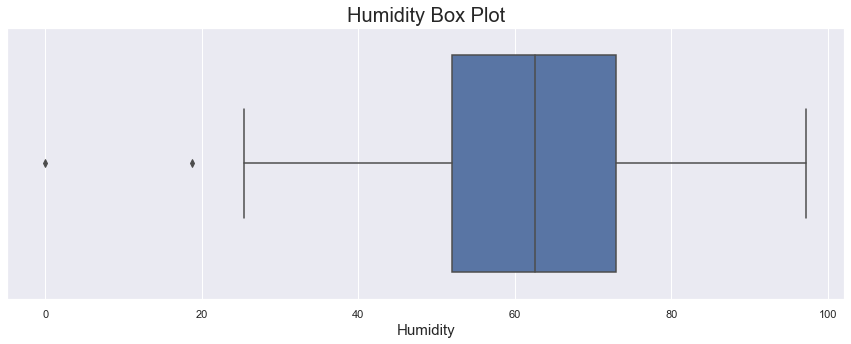

In [35]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bike_df, x='hum')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

In [36]:
bike_df[bike_df['hum'] == 0]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
69,10,spring,0,March,0,thursday,1,light,15.952731,0.0,17.545759,46,577,623


#### As part of data validation, we will pick 20% of values prior to specific date & 20% of values after the specific date and generate a plot to check the behaviour

In [37]:
humidity_check =bike_df[(bike_df.index > int(69*0.8)) & (bike_df.index < int(69*1.2))]
humidity_check

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
56,25,spring,0,February,0,friday,1,mist,14.938268,71.2174,23.218113,120,1341,1461
57,26,spring,0,February,0,saturday,0,clear,11.582500,53.7917,12.500257,424,1545,1969
58,27,spring,0,February,0,sunday,0,clear,14.082598,68.0000,8.391616,694,1708,2402
59,28,spring,0,February,0,monday,1,mist,16.698193,87.6364,19.408962,81,1365,1446
60,1,spring,0,March,0,tuesday,1,clear,10.933347,53.5000,14.500475,137,1714,1851
61,2,spring,0,March,0,wednesday,1,clear,13.735000,44.9583,20.624811,231,1903,2134
62,3,spring,0,March,0,thursday,1,clear,8.131653,31.8333,15.125518,123,1562,1685
63,4,spring,0,March,0,friday,1,mist,10.728347,61.0417,13.624182,214,1730,1944
64,5,spring,0,March,0,saturday,0,mist,15.750847,78.9167,16.875357,640,1437,2077


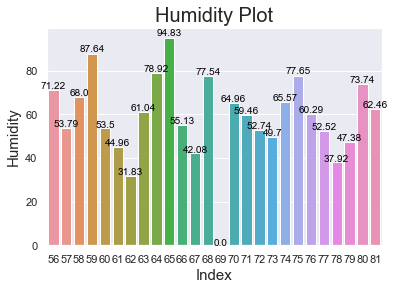

In [38]:
graph = sns.barplot(y=humidity_check.hum, x=humidity_check.index)
plt.title('Humidity Plot', fontdict={'fontsize': 20})
plt.xlabel('Index', fontdict={'fontsize': 15})
plt.ylabel('Humidity', fontdict={'fontsize': 15})
counter = 0
for index, row in humidity_check.iterrows():
    graph.text(counter, row.hum*1.01, round(row.hum, 2), color='black', ha="center")
    counter+=1
plt.show()

#### From the above graph we can say that, the value of humidity as 0 is practically impossible. This could have been a error while data entry so we can proceed with imputing the mean value of the column to the respectively.

In [39]:
# Imputing the mean value at the zero humidity level
mean_value = humidity_check.hum.mean()
mean_value

58.64794230769231

In [40]:
bike_df.at[int(bike_df[bike_df['hum'] == 0.0].hum.index.values), "hum"] = mean_value

In [41]:
#Validating if the imputed value is present or not?
bike_df[bike_df.hum < 10]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,


####  From data dictionary,
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users

In [42]:
bike_df.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

#### Wind speed seems to be in legitimate range, so no change required. We can drop 'casual' and 'registered' column as  our aim for this assignment is to predict the final count (irrespective of casual & registered count)

In [43]:
bike_df = bike_df.drop(columns=['casual', 'registered'])

# Data Transformation

#### Following Columns are Categorical Nominal Variables which needs to encoded using One Hot Encoder Method (i.e. Creating Dummy Variables):
- Month
- Season
- Weekday
- Weather Situation

In [44]:
dummy_var_columns = ['mnth', 'season', 'weekday', 'weathersit']
res = pd.get_dummies(bike_df[dummy_var_columns], drop_first=True)
res.head(10)

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
bike_df = pd.concat([bike_df,res], axis=1)
bike_df = bike_df.drop(columns=dummy_var_columns)

# Data Splitting

In [46]:
# splitting data into 70/30
df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)

In [47]:
df_train.shape

(510, 30)

In [48]:
df_test.shape

(220, 30)

# Data Normalization

#### Following Columns are Numerical which needs to be Normalised:
- Date
- Temperature
- Humidity
- Windspeed

In [49]:
numerical_variables = ['date', 'temp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])
df_train.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
577,1.000000,1,0,1,0.815169,0.659744,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
427,0.066667,1,0,0,0.442393,0.553780,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,0,0,1
729,0.966667,1,0,0,0.245101,0.377528,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
483,0.900000,1,0,0,0.395666,0.385516,0.188475,0.482973,0,0,...,1,0,0,1,0,0,0,0,0,1
112,0.700000,0,0,1,0.345824,0.692225,0.380981,0.191095,0,0,...,1,0,0,0,0,0,0,0,0,1
581,0.100000,1,0,0,0.914852,0.543663,0.462538,0.782559,1,0,...,0,0,0,1,0,0,0,0,0,0
501,0.500000,1,0,1,0.719639,0.651757,0.172431,0.851588,0,0,...,1,0,0,0,0,0,0,1,0,0
480,0.800000,1,0,1,0.520271,0.306709,0.164434,0.710308,0,0,...,1,0,0,0,0,0,0,1,0,0
473,0.566667,1,0,1,0.503656,0.487220,0.270032,0.499885,0,0,...,1,0,0,0,0,0,0,1,0,1


# Manual Analysis of Variable Using Correlaion-Co-efficient

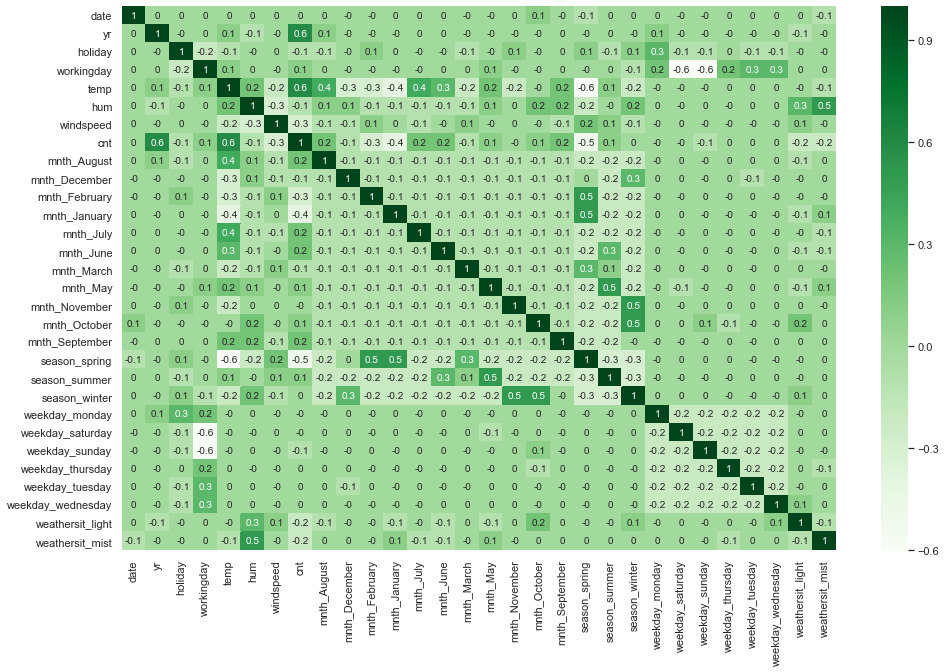

In [50]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Greens')
plt.show()

#### From the above result, we could see that no variable is highly correlated with another variable. So, we can  proceed and check Multi-Collinearity in model builidng part

# Defining Target & Feature Variables 

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train

# Iterative Modeling Process

#### From our present dataset, we have almost 30 features to Predict our outcome. So we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)

#### Setting the arbitary number as 15, which means the method will rank first 15 predictors as 1 & remaining as 0.

In [52]:
# Creating a generalised function for evaluating Variance Inflation Factor
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

## RFE (Recursive Feature Elimination)

In [53]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
28,weathersit_mist,True,1
27,weathersit_light,True,1
20,season_winter,True,1
22,weekday_saturday,True,1
11,mnth_July,True,1
10,mnth_January,True,1
17,mnth_September,True,1
18,season_spring,True,1
6,windspeed,True,1
5,hum,True,1


#### From RFE method we have top 15 predictors which will impact our outcome hence we will continue to validate this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

# Model Building

In [55]:
# Model-1
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          9.88e-190
Time:                        17:20:23   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2316      0.022     10.329      0.000       0.188       0.276
yr                   0.2312      0.008     28.540      0.000       0.215       0.247
holiday             -0.0103      0.021     -0.491      0.624      -0.052       0.031
workingday           0.0918      0.009     10.424      0.000       0.074       0.109
temp                 0.4625      0.032     14.625      0.000       0.400       0.525
hum                 -0.1226      0.032     -3.812      0.000      -0.186      -0.059
windspeed           -0.1774      0.026     -6.904      0.000      -0.228      -0.127
mnth_January        -0.0411      0.017     -2.359      0.019      -0.075      -0.007
mnth_July           -0.0753      0.017     -4.403      0.000      -0.109      -0.042
mnth_September       0.0599      0.015      3.891      0.000       0.030       0.090
season_spring       -0.0975      0.015     -6.382      0.000      -0.128      -0.068
season_winter        0.0522      0.012      4.200      0.000       0.028       0.077
weekday_saturday     0.1014      0.011      9.184      0.000       0.080       0.123
weekday_sunday       0.0487      0.012      4.232      0.000       0.026       0.071
weathersit_light    -0.2439      0.027     -8.947      0.000      -0.297      -0.190
weathersit_mist     -0.0562      0.011     -5.260      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       63.153   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.136
Skew:                          -0.632   Prob(JB):                     1.69e-35
Kurtosis:                       5.437   Cond. No.                     7.91e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,workingday,32.12
1,weekday_saturday,8.01
2,weekday_sunday,7.73
3,temp,3.23
4,season_spring,2.72
5,holiday,2.22
6,hum,2.06
7,season_winter,1.82
8,weathersit_mist,1.64
9,mnth_January,1.55


#### In the above model we see that P-Value of "Holiday" feature is more than 0.05, which make its co-efficient insignificant.
#### So, we will proceed ahead with dropping this feature and designing model again.

In [57]:
# Model-2 :  Dropping Holiday feature
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          9.88e-190
Time:                        17:20:26   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2212      0.037      5.969      0.000       0.148       0.294
yr                   0.2312      0.008     28.540      0.000       0.215       0.247
workingday           0.1021      0.026      3.991      0.000       0.052       0.152
temp                 0.4625      0.032     14.625      0.000       0.400       0.525
hum                 -0.1226      0.032     -3.812      0.000      -0.186      -0.059
windspeed           -0.1774      0.026     -6.904      0.000      -0.228      -0.127
mnth_January        -0.0411      0.017     -2.359      0.019      -0.075      -0.007
mnth_July           -0.0753      0.017     -4.403      0.000      -0.109      -0.042
mnth_September       0.0599      0.015      3.891      0.000       0.030       0.090
season_spring       -0.0975      0.015     -6.382      0.000      -0.128      -0.068
season_winter        0.0522      0.012      4.200      0.000       0.028       0.077
weekday_saturday     0.1117      0.027      4.134      0.000       0.059       0.165
weekday_sunday       0.0591      0.027      2.174      0.030       0.006       0.112
weathersit_light    -0.2439      0.027     -8.947      0.000      -0.297      -0.190
weathersit_mist     -0.0562      0.011     -5.260      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       63.153   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.136
Skew:                          -0.632   Prob(JB):                     1.69e-35
Kurtosis:                       5.437   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,hum,20.21
1,temp,17.23
2,workingday,15.30
3,windspeed,4.65
4,weekday_saturday,4.21
5,weekday_sunday,4.08
6,season_spring,3.04
7,weathersit_mist,2.45
8,yr,2.10
9,season_winter,2.09


#### From the above results, Though the P-Value is under control, In the VIF table, we see that Humidity column seems to be explained by some other feature. So we will again drop this humidity feature and re-design our model.

In [59]:
# Model-3 :  Dropping Humidity feature
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.3
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          8.52e-188
Time:                        17:20:31   Log-Likelihood:                 506.25
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     496   BIC:                            -925.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1705      0.035      4.863      0.000       0.102       0.239
yr                   0.2352      0.008     28.886      0.000       0.219       0.251
workingday           0.1025      0.026      3.955      0.000       0.052       0.153
temp                 0.4307      0.031     13.931      0.000       0.370       0.491
windspeed           -0.1492      0.025     -5.982      0.000      -0.198      -0.100
mnth_January        -0.0442      0.018     -2.501      0.013      -0.079      -0.009
mnth_July           -0.0675      0.017     -3.919      0.000      -0.101      -0.034
mnth_September       0.0569      0.016      3.653      0.000       0.026       0.087
season_spring       -0.1020      0.015     -6.602      0.000      -0.132      -0.072
season_winter        0.0426      0.012      3.454      0.001       0.018       0.067
weekday_saturday     0.1142      0.027      4.170      0.000       0.060       0.168
weekday_sunday       0.0567      0.028      2.058      0.040       0.003       0.111
weathersit_light    -0.2921      0.024    -11.939      0.000      -0.340      -0.244
weathersit_mist     -0.0806      0.009     -9.294      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       65.698   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.520
Skew:                          -0.658   Prob(JB):                     1.14e-36
Kurtosis:                       5.461   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,workingday,13.48
1,temp,12.77
2,windspeed,4.52
3,weekday_saturday,3.85
4,weekday_sunday,3.61
5,season_spring,2.85
6,yr,2.07
7,season_winter,1.78
8,mnth_January,1.65
9,weathersit_mist,1.59


#### From the above results, P-Value is under control but In the VIF table, we see that Working Day column seems to be explained by some other feature. So we will drop this Working Day column and re-design our model.

In [61]:
# Model-4 :  Dropping Working Day feature
col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          1.23e-185
Time:                        17:20:41   Log-Likelihood:                 498.33
No. Observations:                 510   AIC:                            -970.7
Df Residuals:                     497   BIC:                            -915.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2704      0.025     10.968      0.000       0.222       0.319
yr                   0.2357      0.008     28.534      0.000       0.219       0.252
temp                 0.4313      0.031     13.749      0.000       0.370       0.493
windspeed           -0.1515      0.025     -5.988      0.000      -0.201      -0.102
mnth_January        -0.0451      0.018     -2.516      0.012      -0.080      -0.010
mnth_July           -0.0668      0.017     -3.822      0.000      -0.101      -0.032
mnth_September       0.0532      0.016      3.370      0.001       0.022       0.084
season_spring       -0.1047      0.016     -6.690      0.000      -0.136      -0.074
season_winter        0.0393      0.012      3.144      0.002       0.015       0.064
weekday_saturday     0.0156      0.012      1.357      0.175      -0.007       0.038
weekday_sunday      -0.0419      0.012     -3.516      0.000      -0.065      -0.018
weathersit_light    -0.2875      0.025    -11.593      0.000      -0.336      -0.239
weathersit_mist     -0.0787      0.009     -8.955      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       80.230   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.941
Skew:                          -0.775   Prob(JB):                     1.29e-47
Kurtosis:                       5.785   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,4.75
1,windspeed,4.04
2,season_spring,2.26
3,yr,2.06
4,mnth_January,1.60
5,weathersit_mist,1.53
6,season_winter,1.41
7,mnth_July,1.36
8,weekday_saturday,1.22
9,weekday_sunday,1.21


#### In the above model we see that P-Value of "weekday_saturday" feature is more than 0.05, which make its co-efficient insignificant.
#### So, we will proceed ahead with dropping this feature and designing model again.

In [63]:
# Model-5 :  Dropping weekday_saturday feature
col = col.drop(['weekday_saturday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          1.99e-186
Time:                        17:20:51   Log-Likelihood:                 497.39
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2732      0.025     11.110      0.000       0.225       0.321
yr                   0.2354      0.008     28.482      0.000       0.219       0.252
temp                 0.4304      0.031     13.713      0.000       0.369       0.492
windspeed           -0.1499      0.025     -5.927      0.000      -0.200      -0.100
mnth_January        -0.0449      0.018     -2.504      0.013      -0.080      -0.010
mnth_July           -0.0661      0.017     -3.784      0.000      -0.100      -0.032
mnth_September       0.0532      0.016      3.372      0.001       0.022       0.084
season_spring       -0.1047      0.016     -6.682      0.000      -0.135      -0.074
season_winter        0.0396      0.012      3.171      0.002       0.015       0.064
weekday_sunday      -0.0447      0.012     -3.813      0.000      -0.068      -0.022
weathersit_light    -0.2873      0.025    -11.576      0.000      -0.336      -0.239
weathersit_mist     -0.0787      0.009     -8.947      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       75.227   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.405
Skew:                          -0.714   Prob(JB):                     1.24e-46
Kurtosis:                       5.812   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,4.69
1,windspeed,4.01
2,season_spring,2.25
3,yr,2.06
4,mnth_January,1.60
5,weathersit_mist,1.53
6,season_winter,1.40
7,mnth_July,1.36
8,mnth_September,1.20
9,weekday_sunday,1.17


#### From the above Model Summary Report we can say that all the p-values (less than 0.05) of respective features are well under control and VIF value of the features are less than 5. So we can proceed with validating Linear regression assumption on this above model

# Validationg Linear Regression Assumptions

#### Normally Distributed Error Terms

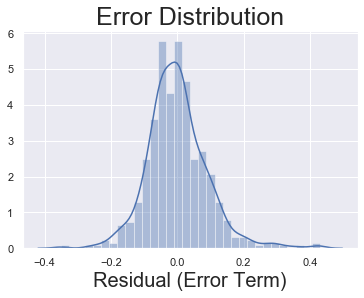

In [65]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

#### Error Terms Being Independent

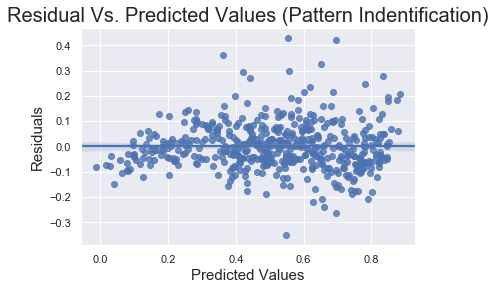

In [66]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

#### Homoscedasticity

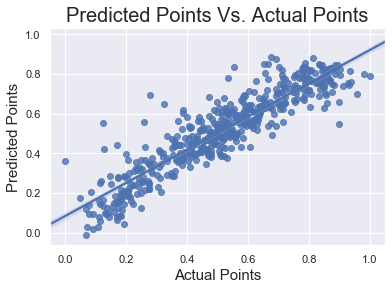

In [67]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

#### Multicorrelation

In [68]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,4.69
1,windspeed,4.01
2,season_spring,2.25
3,yr,2.06
4,mnth_January,1.60
5,weathersit_mist,1.53
6,season_winter,1.40
7,mnth_July,1.36
8,mnth_September,1.20
9,weekday_sunday,1.17


In [69]:
#Evaluating Correlation Co-efficients of Predictors Impacting Target Variable
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
temp,0.65
yr,0.59
season_spring,-0.55
mnth_January,-0.38
windspeed,-0.25
weathersit_light,-0.23
mnth_September,0.20
weathersit_mist,-0.17
mnth_July,0.16
weekday_sunday,-0.06


#### Observation From Above Results:

- Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

- No relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.

- we see equal variance and do not observe any high concentration of data points in certain region & low concentarion in certain regions.

- VIF value of all the predictors used in the model are less than 5


# Predicting on Test Data

In [70]:
# Transformation on test features (Data Normalization)
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
185,0.100000,0,1,0,0.831783,0.575080,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
536,0.633333,1,0,1,0.901354,0.516506,0.153728,0.712034,0,0,...,1,0,0,0,0,0,0,1,0,0
300,0.866667,0,0,1,0.511964,0.798722,0.334206,0.303382,0,0,...,0,1,0,0,0,1,0,0,0,1
222,0.300000,0,0,1,0.881625,0.301917,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,1,0,0
153,0.033333,0,0,1,0.817246,0.149627,0.537414,0.569029,0,0,...,1,0,0,0,0,1,0,0,0,0
405,0.266667,1,0,1,0.256524,0.478167,0.326196,0.438104,0,0,...,0,0,0,0,0,1,0,0,0,0
199,0.566667,0,0,1,0.856704,0.592119,0.372990,0.510354,0,0,...,0,0,1,0,0,0,0,0,0,0
172,0.666667,0,0,1,0.774672,0.744409,0.276724,0.553728,0,0,...,0,0,0,0,0,0,1,0,0,1
513,0.900000,1,1,0,0.814131,0.624068,0.331536,0.692706,0,0,...,1,0,1,0,0,0,0,0,0,0


In [71]:
df_test.describe()

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.500606,0.481818,0.036364,0.700000,0.558718,0.551340,0.313293,0.522154,0.059091,0.086364,...,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.285182,0.500809,0.187620,0.459303,0.233187,0.184403,0.159584,0.219163,0.236333,0.281541,...,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.084665,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258333,0.000000,0.000000,0.000000,0.355429,0.416134,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483333,0.000000,0.000000,1.000000,0.558172,0.535676,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.766667,1.000000,0.000000,1.000000,0.755981,0.682271,0.402718,0.677750,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,1.002662,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#Target/Feature split
y_test = df_test.pop('cnt')
X_test = df_test

#### Filtering Test Input and Reserving Required Features Only

In [73]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

## Predicting Test Data 

In [74]:
y_pred = lr_model.predict(X_test_new)

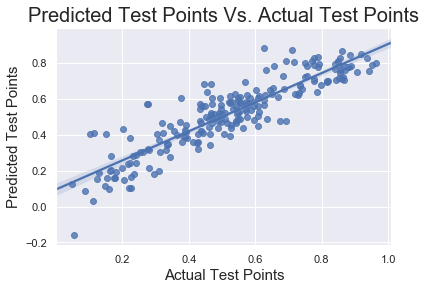

In [75]:
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

#### Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

# Model Evaluation

In [76]:
# R-Square Score
from sklearn.metrics import r2_score
print("R-Square Score on Test Dataset:")
r2_score(y_test, y_pred)

R-Square Score on Test Dataset:


0.8054582636162073

In [77]:
param = pd.DataFrame(lr_model.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
2,temp,0.430390
0,const,0.273187
1,yr,0.235353
6,mnth_September,0.053222
8,season_winter,0.039616
9,weekday_sunday,-0.044717
4,mnth_January,-0.044889
5,mnth_July,-0.066133
11,weathersit_mist,-0.078697


# We can see that the equation for best fitted line is:

## cnt = 0.273 + 0.430 X temp + 0.235 X yr + 0.053 X mnth_September + 0.039 X season_winter - 0.044 X weekday_sunday - 0.044 X mnth_January	 - 0.066 X mnth_July - 0.078 X weathersit_mist	- 0.104 X season_spring	- 0.149 X windspeed	- 0.287 X weathersit_light	

# Inference 

#### All the positive coefficients like temp, yr, mnth_September indicates that an increase in these values will lead to an increase in the value of cnt and all the negative coefficients like weekday_sunday, mnth_January, mnth_July indicates that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by yr, mnth_September & season_winter
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by <b> temperature,season and month.</b>